# UTR-2 antenna pattern calculation

### Import necessary liraries

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

### Main variables

In [94]:
frequency = 18                                          # Frequency, MHz
ku = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])           # U-code (binary)
kv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])        # V-code (binary)
n_points = 401                                          # Number of points to calculate along U and V axes

### Additional parameters

In [95]:
wavelength = (2.997 * np.power(10,8) / (frequency * np.power(10,6)))    # Wavelength, m
norm_freq = 1.570796 * frequency                                        # Normalized frequency

h_dip = 3.5                                                        # Height of UTR dipole above ground, m
d1 = 7.5                                                           # Array spacing along NS direction, m
d2 = 9                                                             # Array spacing along EW direction, m
b = 111 / 90
C = ([1, 1, 1, 1])                                                 # Amplitude distribution, for 5% field side lobes C = [1 0.65 0.57 0.35]

Ucur = np.linspace(-1.0, 1.0, num=n_points)                        # Current U coordinates
Vcur = np.linspace(-1.0, 1.0, num=n_points)                        # Current V coordinates

z = np.array([8, 16, 64, 128, 8, 16, 64, 1024, 512])               # Supplementary matrix

### UTR-2 dipole antenna pattern

In [75]:
f_dip = np.zeros((n_points, n_points))

for i in range (0, n_points):
    for j in range(0, n_points):
        f_dip[i, j] = (1 - np.power(Ucur[i], 2)) * np.power(np.sin(((2 * np.pi * h_dip) / wavelength) * np.sqrt(1 - np.power(Ucur[i], 2)) - np.power(Vcur[j], 2)),2)


Text(0.5, 0.98, 'RP of single UTR-2 dipole')

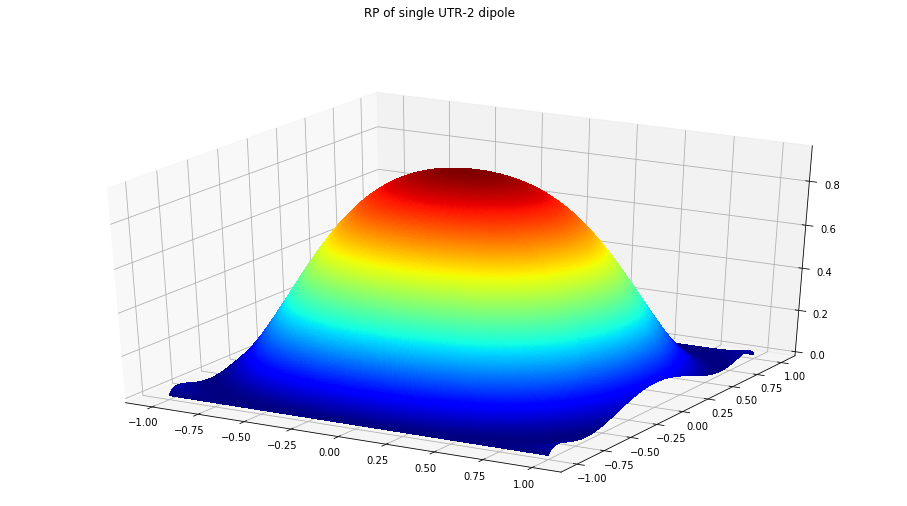

In [76]:
U, V = np.meshgrid(Ucur, Vcur)
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(U, V, f_dip, cmap = 'jet', rstride=1, cstride=1, linewidth=0, antialiased=False)
fig.suptitle('RP of single UTR-2 dipole')

In [77]:
# Calculations of U and V codes in decimal notation
Nu = 0
for i in range (0, 10):
    Nu = Nu + ku[i] * np.power(2, ((i-1) * ku[i]))

Nv = 0
for j in range (0, 11):
    Nv = Nv + kv[j] * np.power(2, ((j-1) * kv[j]))

print (' U code: ', Nu, ',    V code: ', Nv)

 U code:  0 ,    V code:  0


In [78]:
v = np.zeros(9)
u = np.zeros(9)

for i in range (0, 9):
    v[i] = np.power((-1), kv[i]) * (np.fix(((Nv - kv[i] * 1024) * z[i]) / 1024) + 0.5) / z[i]
    u[i] = np.power((-1), ku[i]) * (np.fix(((Nu - ku[i] * 512 ) * z[i]) / 512 ) + 0.5) / (1.2 * z[i])
# print(u, v)

In [79]:
# Array factors of phase shifters of different stages

x1 = np.zeros(n_points)
f1 = np.zeros(n_points)
for i in range (0, n_points):
    x1[i] = 0.06 * norm_freq * (Ucur[i] - u[0])
    f1[i] = np.power(np.sin(6 * x1[i]) / (6 * np.sin(x1[i])), 2)

x2 = np.zeros(n_points)
f2 = np.zeros(n_points)
for j in range (0, n_points):
    x2[j] = 0.05 * norm_freq * (Vcur[j] - v[1])
    f2[j] = np.power(np.sin(5 * x2[j]) / (5 * np.sin(x2[j])), 2)

x3 = np.zeros(n_points)
f3 = np.zeros(n_points)
for j in range (0, n_points):
    x3[j] = 0.25 * norm_freq * (Vcur[j] - v[2])
    f3[j] = np.power(np.sin(3 * x3[j]) / (3 * np.sin(x3[j])), 2)

x4 = np.zeros(n_points)
f4 = np.zeros(n_points)
for j in range (0, n_points):
    x4[j] = 0.75 * norm_freq * (Vcur[j] - v[3])
    f4[j] = np.power(np.cos(x4[j]), 2)

x5 = np.zeros(n_points)
f5 = np.zeros(n_points)
for j in range (0, n_points):
    x5[j] = 0.05 * norm_freq * (Vcur[j] - v[4])
    f5[j] = np.power(np.sin(6 * x5[j]) / (6 * np.sin(x5[j])), 2)

x6 = np.zeros(n_points)
f6 = np.zeros(n_points)
for i in range (0, n_points):
    x6[i] = 0.06 * norm_freq * (Ucur[i] - u[5])
    f6[i] = np.power(np.sin(5 * x6[i]) / (5 * np.sin(x6[i])), 2)

x7 = np.zeros(n_points)
f7 = np.zeros(n_points)
for i in range (0, n_points):
    x7[i] = 0.30 * norm_freq * (Ucur[i] - u[6])
    f7[i] = np.power(np.sin(5 * x7[i]) / (5 * np.sin(x7[i])), 2)

x8 = np.zeros(n_points)
for j in range (0, n_points):
    x8[j] = 1.5 * norm_freq * (Vcur[j] - v[7])

x9 = np.zeros(n_points)
for i in range (0, n_points):
    x9[i] = 1.5 * norm_freq * (Ucur[i] - u[8])

### Pattaerns of UTR-2 sections

In [80]:
f_north_section = np.zeros((n_points, n_points))
f_west_section = np.zeros((n_points, n_points))

for i in range (0, n_points):
    for j in range (0, n_points):
        f_north_section[i,j] = f_dip[i,j] * f1[i] * f2[j] * f3[j] * f4[j]
        f_west_section [i,j] = f_dip[i,j] * f5[j] * f6[i] * f7[i]

Text(0.5, 0.98, 'RP of UTR-2 sections')

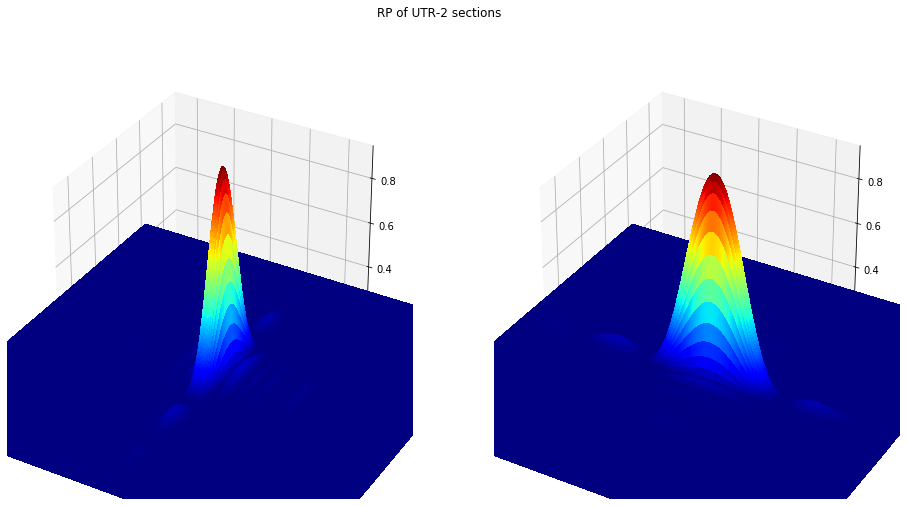

In [81]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(U, V, f_north_section, cmap = 'jet', rstride=1, cstride=1, linewidth=0, antialiased=False)
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-0.5, 0.5)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(U, V, f_west_section , cmap = 'jet', rstride=1, cstride=1, linewidth=0, antialiased=False)
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(-0.5, 0.5)
fig.suptitle('RP of UTR-2 sections')

In [82]:
f_norm_north_section = f_north_section / np.max(f_north_section)
f_norm_west_section  = f_west_section / np.max (f_west_section)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


Text(0.5, 0.98, 'RP of UTR-2 sections in logarythmic scale')

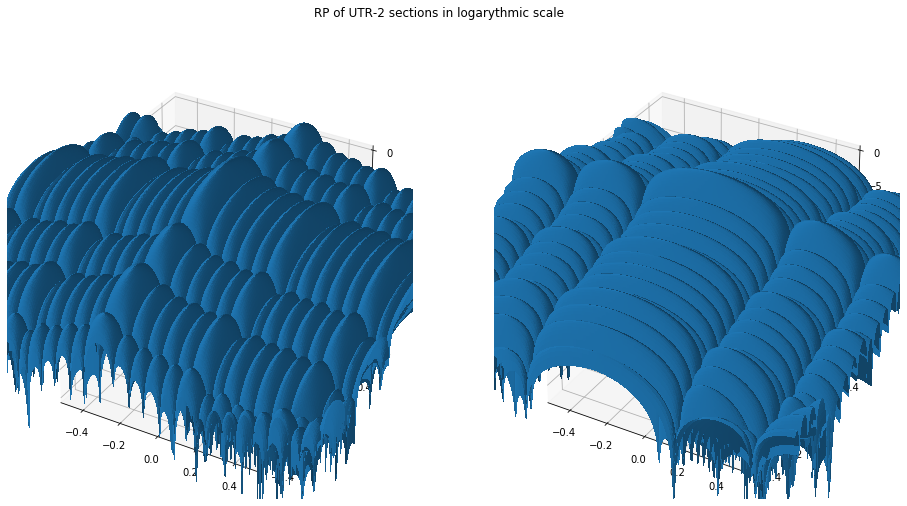

In [83]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(U, V, np.log10(np.power(f_norm_north_section,2)), rstride=1, cstride=1, linewidth=0, antialiased=False)
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-0.5, 0.5)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(U, V, np.log10(np.power(f_norm_west_section,2)), rstride=1, cstride=1, linewidth=0, antialiased=False)
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(-0.5, 0.5)
fig.suptitle('RP of UTR-2 sections in logarythmic scale')

### Patterns of UTR-2 arms

In [84]:
f_northsouth_arm = np.zeros((n_points, n_points))
f_west_arm = np.zeros((n_points, n_points))

for i in range (0, n_points):
    for j in range (0, n_points):
        f_northsouth_arm[i,j] =  f_north_section[i,j] * np.power((C[0] * np.cos(b * x8[j]) + C[1] * np.cos((b+2) * x8[j]) + C[2] * np.cos((b+4) * x8[j]) + C[3] * np.cos((b+6)*x8[j])), 2)
        f_west_arm [i,j] = f_west_section[i,j] * np.power((np.cos(2 * x9[i])), 2) * np.power((np.cos(x9[i])), 2)


Text(0.5, 0.98, 'RP of UTR-2 arms')

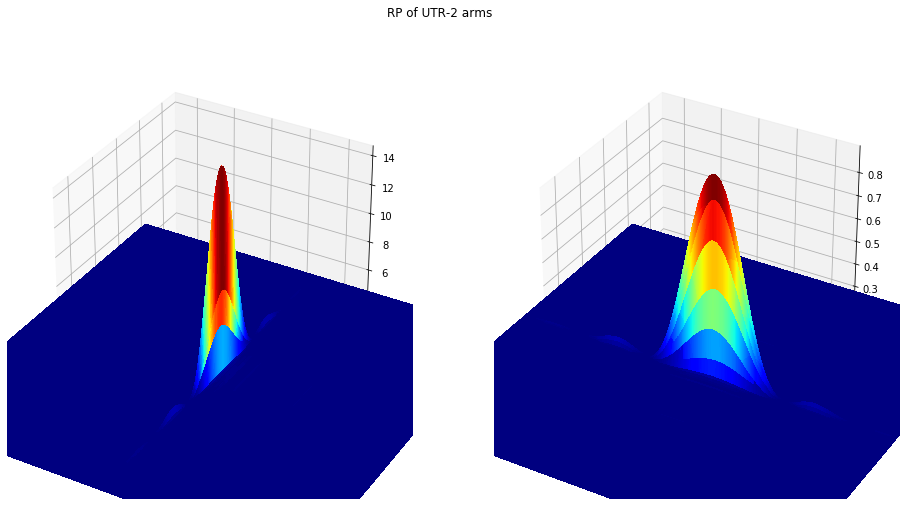

In [85]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(U, V, f_northsouth_arm, cmap = 'jet', rstride=1, cstride=1, linewidth=0, antialiased=False)
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-0.5, 0.5)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(U, V, f_west_arm , cmap = 'jet', rstride=1, cstride=1, linewidth=0, antialiased=False)
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(-0.5, 0.5)
fig.suptitle('RP of UTR-2 arms')

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


Text(0.5, 0.98, 'RP of UTR-2 arms in logarythmic scale')

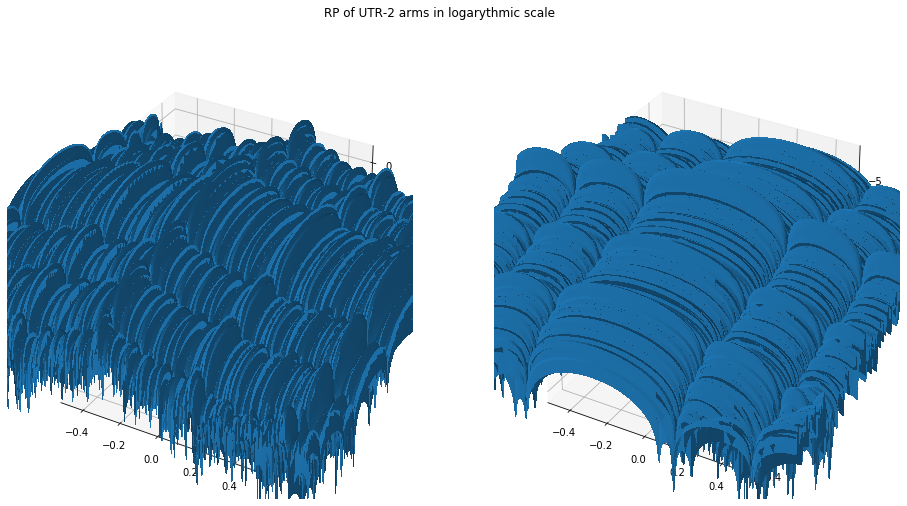

In [86]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(U, V, np.log10(np.power(f_northsouth_arm,2)), rstride=1, cstride=1, linewidth=0, antialiased=False)
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-0.5, 0.5)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(U, V, np.log10(np.power(f_west_arm,2)), rstride=1, cstride=1, linewidth=0, antialiased=False)
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(-0.5, 0.5)
fig.suptitle('RP of UTR-2 arms in logarythmic scale')

201


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


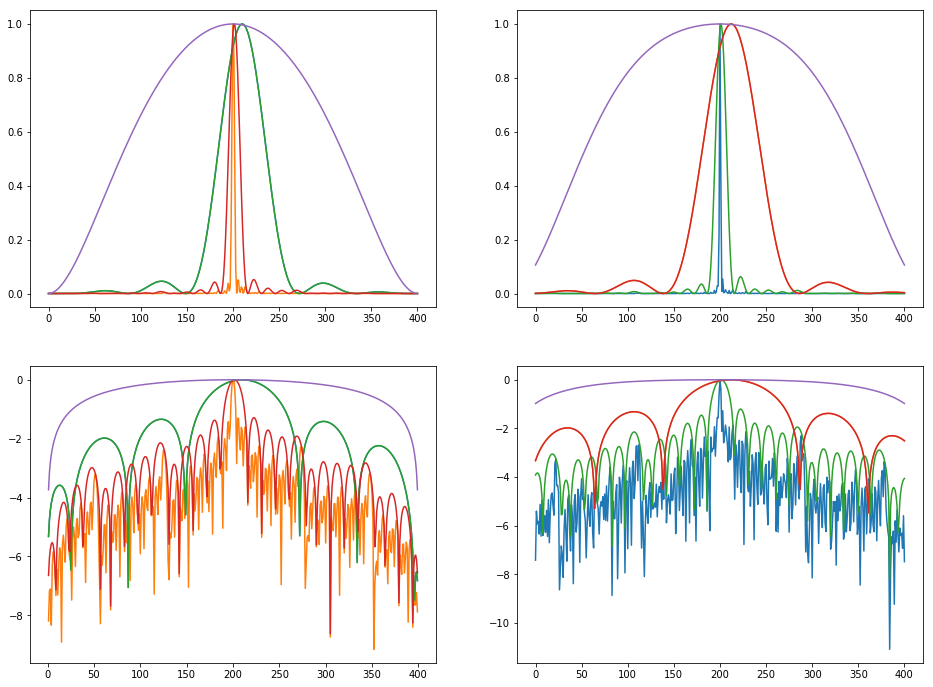

In [90]:

center = int(np.floor(n_points/2)+1)       # Center of both axes (zenith direction)

fig = plt.figure(figsize = (16,12))

ax1 = fig.add_subplot(221)
ax1.plot(f_northsouth_arm[:,center] / np.max(f_northsouth_arm[:,center]))
ax1.plot(f_west_arm[:,center] / np.max(f_west_arm[:,center]))
ax1.plot(f_north_section[:,center] / np.max(f_north_section[:,center]))
ax1.plot(f_west_section[:,center] / np.max(f_west_section[:,center]))
ax1.plot(f_dip[:,center] / np.max(f_dip[:,center]))

ax2 = fig.add_subplot(222)
ax2.plot(f_northsouth_arm[center,:] / np.max(f_northsouth_arm[center,:]))
ax2.plot(f_west_arm[center,:] / np.max(f_west_arm[center,:]))
ax2.plot(f_north_section[center,:] / np.max(f_north_section[center,:]))
ax2.plot(f_west_section[center,:] / np.max(f_west_section[center,:]))
ax2.plot(f_dip[center,:] / np.max(f_dip[center,:]))

ax3 = fig.add_subplot(223)
ax3.plot(np.log10(f_northsouth_arm[:,center] / np.max(f_northsouth_arm[:,center])))
ax3.plot(np.log10(f_west_arm[:,center] / np.max(f_west_arm[:,center])))
ax3.plot(np.log10(f_north_section[:,center] / np.max(f_north_section[:,center])))
ax3.plot(np.log10(f_west_section[:,center] / np.max(f_west_section[:,center])))
ax3.plot(np.log10(f_dip[:,center] / np.max(f_dip[:,center])))

ax4 = fig.add_subplot(224)
ax4.plot(np.log10(f_northsouth_arm[center,:] / np.max(f_northsouth_arm[center,:])))
ax4.plot(np.log10(f_west_arm[center,:] / np.max(f_west_arm[center,:])))
ax4.plot(np.log10(f_north_section[center,:] / np.max(f_north_section[center,:])))
ax4.plot(np.log10(f_west_section[center,:] / np.max(f_west_section[center,:])))
ax4.plot(np.log10(f_dip[center,:] / np.max(f_dip[center,:])))


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


(101, 301)

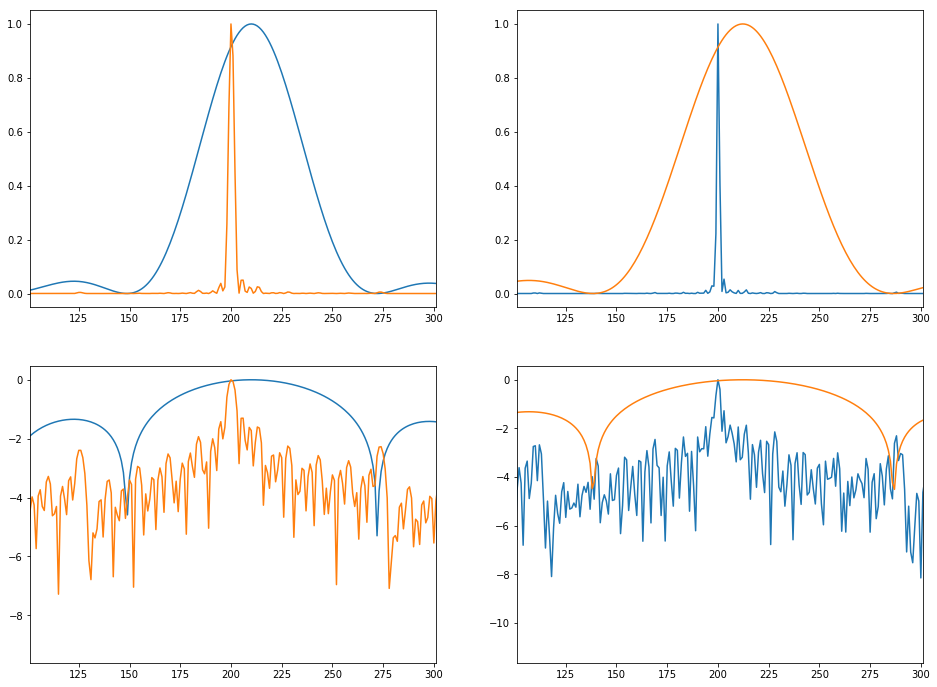

In [96]:
fig = plt.figure(figsize = (16,12))

ax1 = fig.add_subplot(221)
ax1.plot(f_northsouth_arm[:,center] / np.max(f_northsouth_arm[:,center]))
ax1.plot(f_west_arm[:,center] / np.max(f_west_arm[:,center]))
ax1.set_xlim(center - 100, center + 100)

ax2 = fig.add_subplot(222)
ax2.plot(f_northsouth_arm[center,:] / np.max(f_northsouth_arm[center,:]))
ax2.plot(f_west_arm[center,:] / np.max(f_west_arm[center,:]))
ax2.set_xlim(center - 100, center + 100)

ax3 = fig.add_subplot(223)
ax3.plot(np.log10(f_northsouth_arm[:,center] / np.max(f_northsouth_arm[:,center])))
ax3.plot(np.log10(f_west_arm[:,center] / np.max(f_west_arm[:,center])))
ax3.set_xlim(center - 100, center + 100)

ax4 = fig.add_subplot(224)
ax4.plot(np.log10(f_northsouth_arm[center,:] / np.max(f_northsouth_arm[center,:])))
ax4.plot(np.log10(f_west_arm[center,:] / np.max(f_west_arm[center,:])))
ax4.set_xlim(center - 100, center + 100)